In [12]:
import tmap as tm
import torch
import time
import numpy as np
from numpy.random import RandomState
from matplotlib import ticker


import networkx as nx
from sklearn import manifold

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]

# TSNE

In [13]:
def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    
def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()

Determine based on [vocab_size, hidden_size] from opt1.3b config.json https://huggingface.co/facebook/opt-1.3b/blob/main/config.json

In [4]:
# dataset = np.random.rand(50272, 2048)
dataset = np.random.rand(20, 2048)

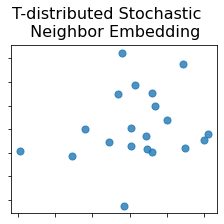

In [14]:
n_components = 2
rng = RandomState(0)

t_sne = manifold.TSNE(
    n_components=n_components,
    learning_rate="auto",
    perplexity=30,
    n_iter=250,
    init="random",
    random_state=rng,
)
S_t_sne = t_sne.fit_transform(dataset)

plot_2d(S_t_sne, 0, "T-distributed Stochastic  \n Neighbor Embedding")

# TMAP

In [9]:
enc = tm.Minhash(d=50, seed=42, sample_size=130)

mh_a = enc.from_weight_array(tm.VectorFloat([1, 1, 1, 1, 0, 1, 0, 1, 1, 0]))
mh_b = enc.from_weight_array(tm.VectorFloat([1, 0, 1, 1, 0, 1, 1, 0, 1, 0]))
mh_c = enc.from_weight_array(tm.VectorFloat([1, 0, 1, 1, 1, 1, 1, 0, 1, 0]))

dist_a_b = enc.get_distance(mh_a, mh_b)
dist_b_c = enc.get_distance(mh_b, mh_c)
dist_a_c = enc.get_distance(mh_a, mh_c)

print(dist_a_b)
print(dist_b_c)
print(dist_a_c)

0.26153844594955444
0.11153846979141235
0.32692307233810425


In [4]:
enc.batch_from_weight_array([tm.VectorFloat([1, 1, 1, 1, 0, 1, 0, 1, 1, 0]),tm.VectorFloat([1, 0, 1, 1, 0, 1, 1, 0, 1, 0])])

[VectorUint[5, 1, 7, 1, 7, 1, 2, 0, 8, 0, 8, 1, 3, 0, 3, 1, 0, 1, 8, 1, 5, 0, 7, 0, 3, 1, 5, 1, 1, 1, 0, 1, 3, 1, 0, 0, 0, 1, 7, 1, 0, 1, 3, 1, 0, 1, 8, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 1, 7, 1, 2, 1, 0, 0, 3, 1, 0, 1, 0, 1, 2, 0, 8, 1, 0, 1, 3, 1, 2, 2, 5, 1, 2, 0, 3, 1, 3, 0, 3, 1, 0, 1, 3, 1, 7, 0, 5, 1, 0, 1, 5, 1, 0, 1, 0, 1, 2, 0, 3, 0, 0, 1, 8, 1, 7, 0, 5, 1, 1, 1, 7, 0, 7, 0, 5, 1, 7, 1, 2, 1, 7, 0, 2, 1, 5, 1, 1, 1, 3, 0, 1, 0, 5, 0, 0, 1, 5, 1, 3, 2, 8, 1, 7, 0, 2, 2, 0, 0, 3, 0, 0, 1, 7, 0, 7, 1, 1, 0, 1, 0, 2, 1, 0, 1, 8, 0, 2, 1, 3, 0, 3, 1, 2, 1, 0, 0, 2, 1, 3, 1, 8, 0, 5, 0, 1, 1, 0, 0, 1, 0, 1, 1, 8, 1, 7, 1, 8, 1, 0, 1, 5, 1, 1, 1, 5, 1, 8, 1, 5, 0, 1, 0, 8, 1, 1, 1, 8, 1, 1, 1, 7, 1, 1, 1, 8, 0, 2, 1, 8, 1, 0, 1, 2, 1, 8, 0, 5, 1, 0, 0, 3, 0, 0, 1, 1, 1, 8, 0, 5, 1],
 VectorUint[5, 1, 5, 1, 0, 1, 2, 0, 8, 0, 8, 1, 3, 0, 3, 1, 6, 0, 6, 1, 5, 0, 6, 0, 3, 1, 5, 1, 8, 1, 0, 1, 3, 1, 6, 1, 0, 1, 6, 1, 0, 1, 3, 1, 0, 1, 8, 1, 2, 0, 6, 1, 0, 1, 2, 0, 2, 1, 5, 3, 2, 1, 0, 0, 3, 

In [10]:
enc = tm.Minhash(d=50, seed=42, sample_size=130)
mh_a, mh_b = enc.batch_from_weight_array([tm.VectorFloat([1, 1, 1, 1, 0, 1, 0, 1, 1, 0]),tm.VectorFloat([1, 0, 1, 1, 0, 1, 1, 0, 1, 0])])
mh_c = enc.from_weight_array(tm.VectorFloat([1, 0, 1, 1, 1, 1, 1, 0, 1, 0]))
print(enc.get_distance(mh_a, mh_b))
print(enc.get_distance(mh_b, mh_c))

0.26153844594955444
0.11153846979141235


In [67]:
# Use 128 permutations to create the MinHash
np.random.seed(42)
enc = tm.Minhash(128, seed=42)

d = 10
n = 100

data = []

# Generating some random data
start = time.time()
for _ in range(n):
    data.append(tm.VectorFloat(np.random.randint(0, high=10, size=d)))
print(f"Generating the data took {(time.time() - start) * 1000}ms.")
data[0:3]

Generating the data took 2.9528141021728516ms.


[VectorFloat[6, 3, 7, 4, 6, 9, 2, 6, 7, 4],
 VectorFloat[3, 7, 7, 2, 5, 4, 1, 7, 5, 1],
 VectorFloat[4, 0, 9, 5, 8, 0, 9, 2, 6, 3]]

In [167]:
lf = tm.LSHForest(128)
# Use batch_add to parallelize the insertion of the arrays
start = time.time()
lf.batch_add(enc.batch_from_weight_array(data))
print(f"Adding the data took {(time.time() - start) * 1000}ms.")

# Index the added data
start = time.time()
lf.index()
print(f"Indexing took {(time.time() - start) * 1000}ms.")

# Construct the k-nearest neighbour graph
start = time.time()
knng_from = tm.VectorUint()
knng_to = tm.VectorUint()
knng_weight = tm.VectorFloat()
_ = lf.get_knn_graph(knng_from, knng_to, knng_weight, 10)

print(f"The layout generation took {(time.time() - start) * 1000}ms.")

Adding the data took 15.555381774902344ms.
Indexing took 0.0ms.
The layout generation took 38.895606994628906ms.


In [150]:
lf.get_hash(0), lf.get_hash(1)

(VectorUint[5, 2, 5, 4, 5, 9, 5, 12, 5, 10, 5, 7, 8, 3, 5, 2, 5, 15, 8, 1, 5, 7, 5, 1, 5, 4, 5, 13, 7, 1, 9, 1, 5, 19, 5, 2, 5, 7, 5, 7, 5, 3, 4, 2, 8, 3, 5, 10, 2, 1, 8, 2, 0, 1, 5, 4, 5, 5, 5, 3, 5, 10, 5, 10, 5, 7, 5, 5, 4, 1, 5, 18, 5, 3, 5, 4, 5, 11, 2, 2, 2, 1, 8, 2, 8, 4, 5, 7, 7, 1, 0, 3, 5, 3, 5, 2, 5, 5, 5, 6, 5, 11, 5, 1, 8, 5, 5, 6, 5, 12, 2, 2, 5, 7, 5, 5, 5, 12, 8, 2, 5, 6, 5, 6, 5, 10, 5, 4, 5, 6, 4, 2, 5, 10, 5, 7, 4, 1, 5, 12, 2, 6, 2, 2, 8, 8, 0, 2, 5, 4, 2, 2, 2, 2, 5, 8, 5, 3, 7, 2, 5, 4, 5, 3, 7, 2, 5, 8, 5, 9, 5, 14, 5, 5, 8, 2, 5, 5, 5, 6, 5, 6, 5, 5, 5, 14, 5, 2, 5, 20, 8, 4, 5, 4, 7, 3, 5, 20, 5, 23, 5, 12, 2, 8, 5, 3, 5, 10, 5, 6, 5, 15, 5, 9, 5, 19, 2, 3, 8, 3, 8, 1, 8, 3, 5, 5, 8, 2, 8, 3, 5, 17, 5, 5, 2, 3, 5, 3, 5, 11, 8, 1, 5, 7, 5, 36, 5, 1, 5, 1, 0, 2, 5, 3, 8, 3],
 VectorUint[8, 2, 7, 3, 7, 4, 7, 2, 7, 3, 7, 5, 2, 2, 2, 2, 7, 4, 1, 3, 2, 8, 2, 3, 1, 13, 2, 3, 7, 1, 1, 0, 1, 2, 1, 5, 7, 2, 7, 2, 7, 3, 2, 9, 1, 1, 1, 3, 2, 1, 1, 4, 1, 4, 7, 5, 7, 3, 7, 2

In [151]:
lf.get_distance_by_id(0, 1)

0.8515625

In [168]:
knng_weight, knng_from, knng_to

(VectorFloat[-1, 0.28125, 0.296875, 0.429688, 0.445312, 0.460938, 0.46875, 0.515625, 0.523438, 0.53125, -1, 0.492188, 0.515625, 0.53125, 0.609375, 0.617188, 0.617188, 0.640625, 0.648438, 0.65625, -1, 0.195312, 0.375, 0.421875, 0.429688, 0.453125, 0.5, 0.507812, 0.515625, 0.53125, -1, 0.296875, 0.421875, 0.453125, 0.476562, 0.523438, 0.53125, 0.5625, 0.585938, 0.609375, -1, 0.304688, 0.390625, 0.492188, 0.507812, 0.507812, 0.515625, 0.523438, 0.53125, 0.539062, -1, 0.445312, 0.492188, 0.523438, 0.554688, 0.554688, 0.554688, 0.585938, 0.59375, 0.601562, -1, 0.03125, 0.203125, 0.304688, 0.375, 0.5, 0.53125, 0.53125, 0.539062, 0.546875, -1, 0.21875, 0.359375, 0.429688, 0.492188, 0.53125, 0.53125, 0.539062, 0.546875, 0.546875, -1, 0.226562, 0.460938, 0.539062, 0.585938, 0.617188, 0.632812, 0.648438, 0.648438, 0.65625, -1, 0.304688, 0.304688, 0.335938, 0.46875, 0.484375, 0.5, 0.507812, 0.53125, 0.53125, -1, 0.492188, 0.53125, 0.59375, 0.59375, 0.601562, 0.609375, 0.617188, 0.648438, 0.648438

In [198]:
edges = [i for i in zip(knng_from, knng_to, knng_weight) if i[0] != i[1]]
# 0, 0 is self connection, remove.
edges[0:20]

[(0, 45, 0.28125),
 (0, 87, 0.296875),
 (0, 71, 0.4296875),
 (0, 51, 0.4453125),
 (0, 22, 0.4609375),
 (0, 13, 0.46875),
 (0, 56, 0.515625),
 (0, 42, 0.5234375),
 (0, 82, 0.53125),
 (1, 10, 0.4921875),
 (1, 81, 0.515625),
 (1, 27, 0.53125),
 (1, 40, 0.609375),
 (1, 23, 0.6171875),
 (1, 24, 0.6171875),
 (1, 34, 0.640625),
 (1, 18, 0.6484375),
 (1, 19, 0.65625),
 (2, 86, 0.1953125),
 (2, 16, 0.375)]

In [199]:
g = nx.Graph()
g.add_weighted_edges_from(edges)

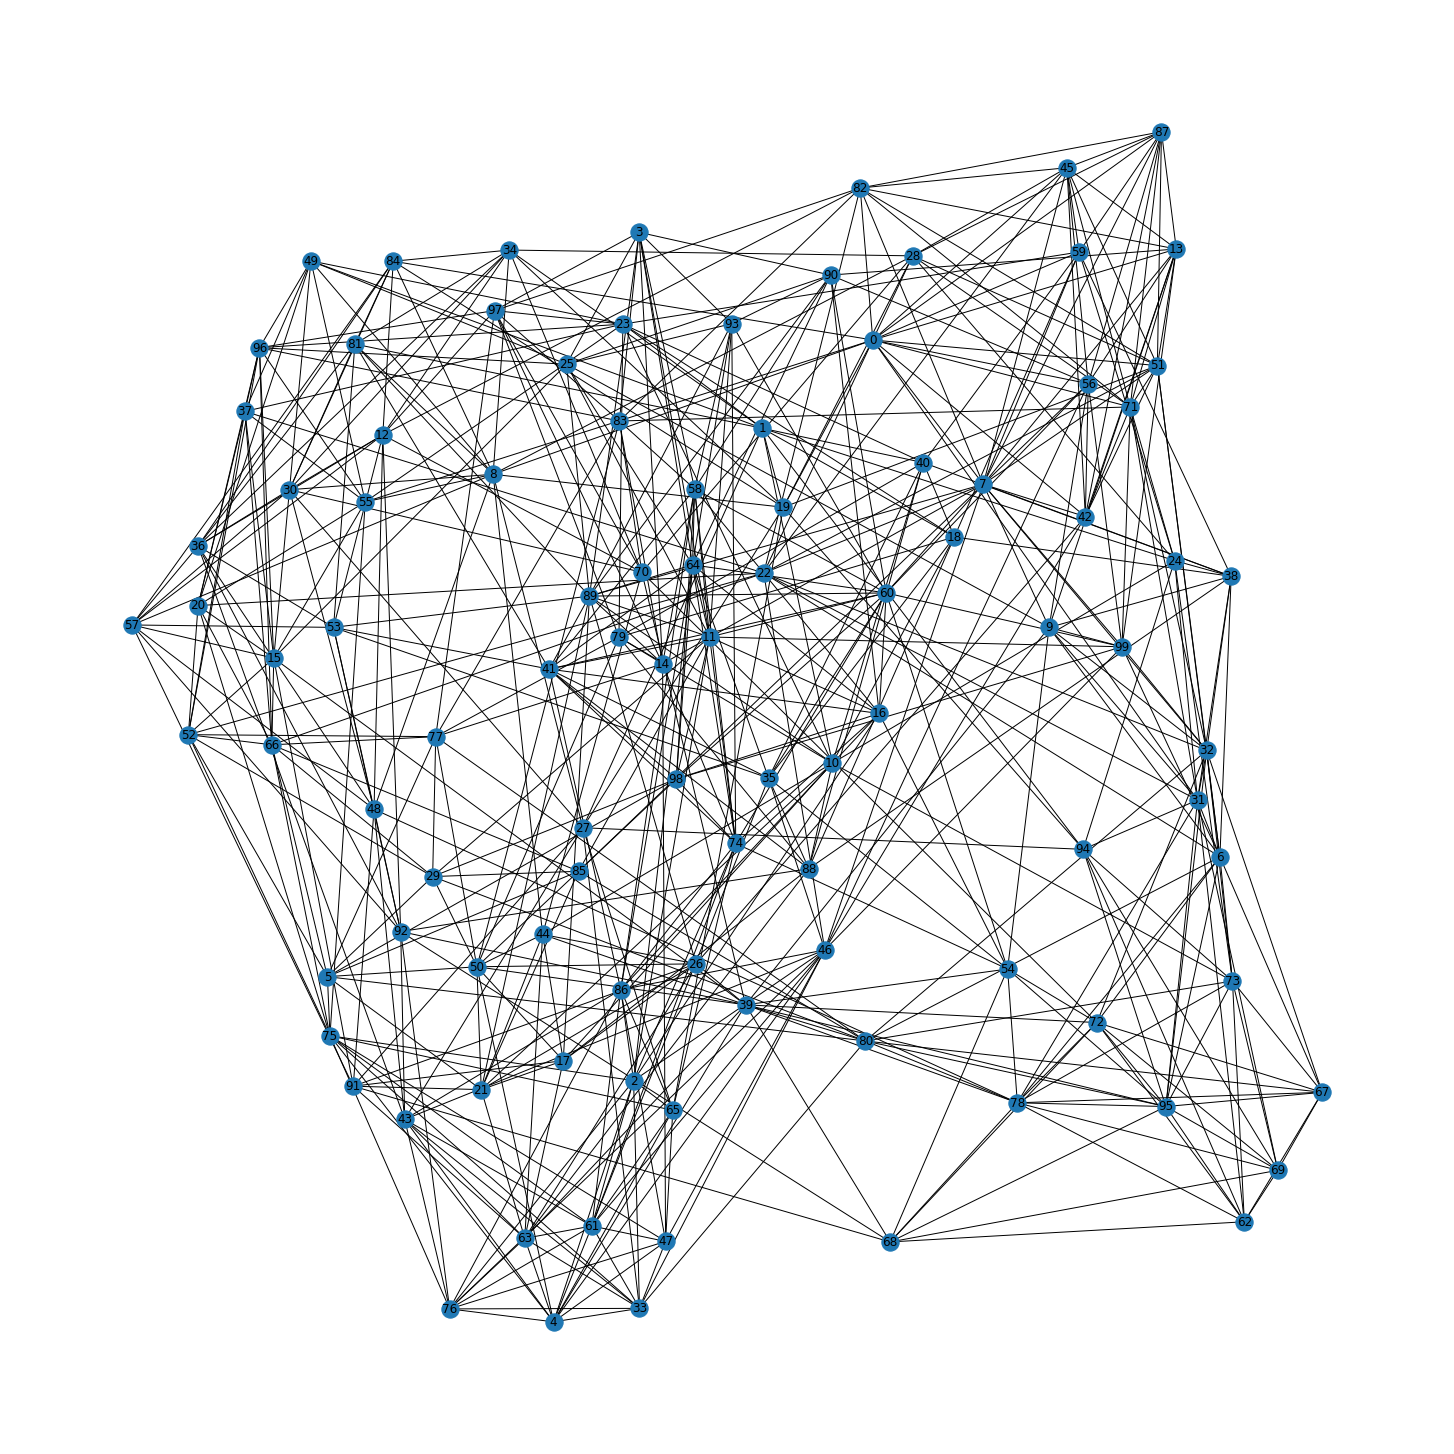

In [200]:
pos = nx.spring_layout(g, seed=32)
nx.draw(g, pos=pos, with_labels=True)

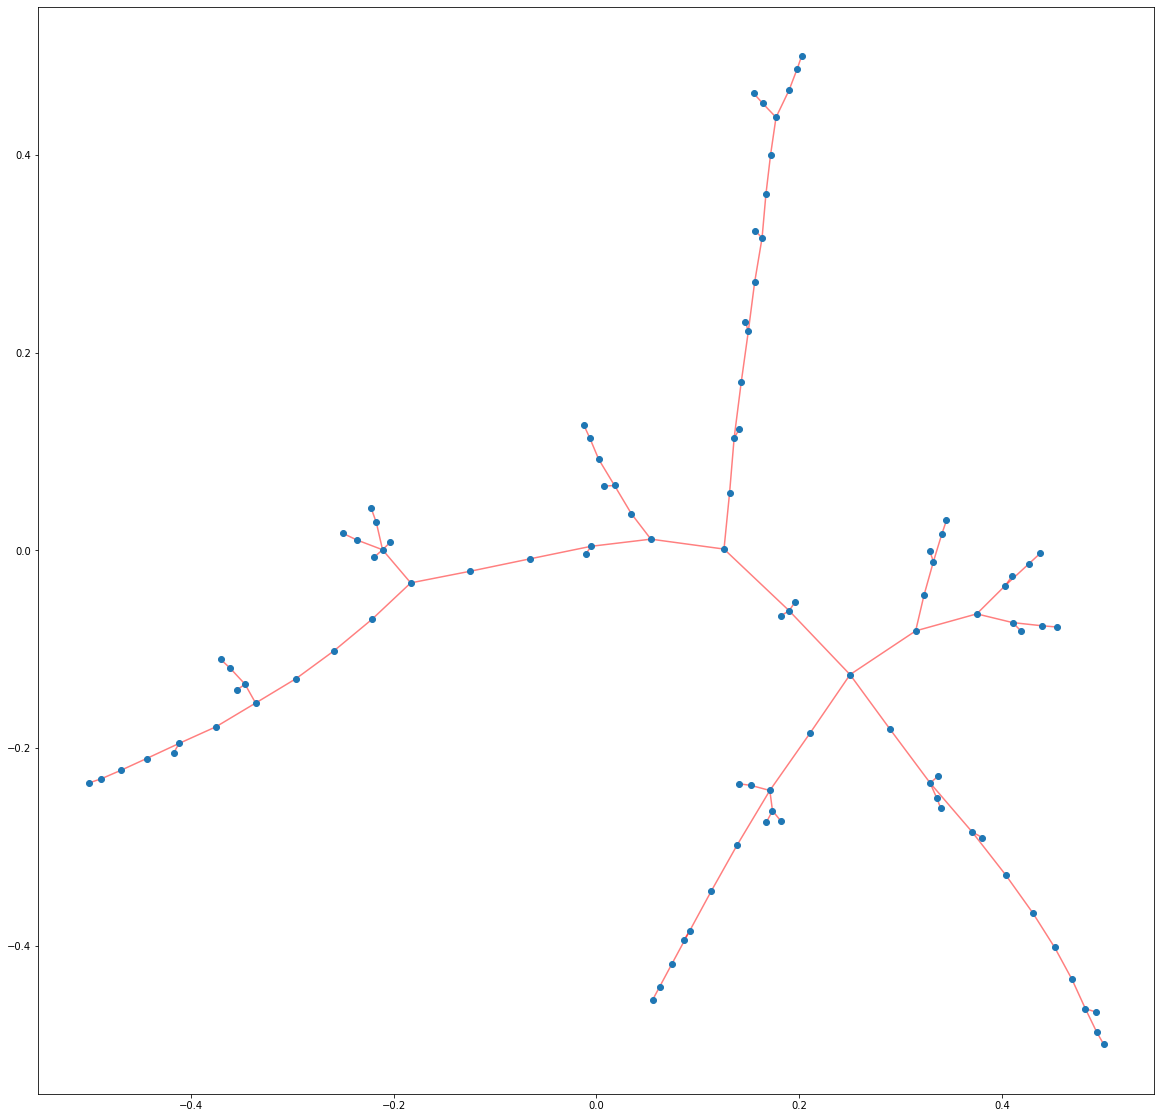

In [156]:
for i in range(len(s)):
    plt.plot(
        [x[s[i]], x[t[i]]],
        [y[s[i]], y[t[i]]],
        "r-",
        alpha=0.5,
        zorder=1,
    )

plt.scatter(x, y)
plt.show()